# Exercise 3 - Sampling

## Objectives
- To understand the effects of sampling in the time and frequency domains 
- To understand why sampling might cause aliasing
- To introduce uniform quantization

In [1]:
import os
os.makedirs('results/ex3', exist_ok=True)

## Lab Exercise
Let us start by thinking about the sampling process in the time domain as shown in Fig. 3.1. It may be interpreted as the multiplication between a continuous-time domain signal $x(t)$ and a train of impulses $s(t)$.

<img src="img/ex2_1.svg" alt="drawing" width="900"/>

<center>Figure 3.1: The sampling process of an continuous-time signal</center>

Observe that $x_s(t) = x(t)\times s(t) = \sum_n x(nT)\delta(t-nT),$ where $-\infty < n < \infty$ and $T=1/f_s$. This is still a continuous-time signal (variable $t$) which are zero-valued for $t \neq nT$ and should not be confused with the discrete-time signal $x[n]$, which comprises the signal amplitudes at the sampling instances and only exists for $n=0,1,2,\cdots$.

Now think about $x(t)$ and $s(t)$ and their frequency domain representations which are shown in Fig. 3.2. 

<img src="img/ex2_2.svg" alt="drawing" width="900"/>
<center>Figure 3.2: Frequency domain representation of $x(t)$ and $s(t)$</center>


You may recall that multiplication in the time domain is equivalent to convolution in the frequency domain. Therefore, the dual of $x_s(t) =x(t) \times s(t)$ in the time domain is $X_s(j\omega) = X(j\omega) * S(j\omega)$ in the frequency domain, where '$*$' denotes the linear convolution. 

Thus, $X_s(j\omega)$ is a periodic function of frequency $\omega$, consisting of the sum of shifted and scaled replicas of $X(j\omega)$, shifted by integer multiples of $\omega_s$ and scaled by $\frac{1}{T}$. 


<img src="img/ex2_3.svg" alt="drawing" width="900"/>
<center>Figure 3.3: A sampled sine wave and its spectrum</center>

### Sampling Theorem

Sampling, therefore, has the effect of creating spectral images at each and every integer multiple of $\omega_s$. Thus, to avoid corruption of information arising from overlapping spectral images (this distortion is called aliasing), the following condition must be met

---
**Definition**:
$$|\omega_m|  < \frac{\omega_s}{2} \: \text{(Nyquist frequency)}, \quad \text{where } \omega_s  =2\pi f_s =2\pi/T_s \quad \implies \quad |\Omega|  < \pi $$

---

The frequency $\omega_s/2$ is called the Nyquist frequency. If $\omega_m$ is the highest frequency component in the signal, then sampling at a rate (frequency) above twice the maximum signal frequency, $\omega_s>|2\omega_m|$, is called *oversampling*. Sampling at a rate below twice this signal frequency, $\omega_s<|2\omega_m|$, is called *undersampling*. Lastly, sampling at a rate exactly twice this maximum signal frequency, $\omega_s=|2\omega_m|$, is called *critical sampling*.

To see aliasing in action, let us generate some more plots using `sinegen` function by setting $N=100$, $f_s=8000$ Hz and varying:

$(\text{i}) \:  f=150$ Hz, $\quad  (\text{ii}) \: f=300$ Hz, $\quad (\text{iii}) \: f=600$ Hz 

$(\text{iv}) \:  f=7400$ Hz, $\quad (\text{v}) \:  f=7700$ Hz $\:$ and $\: (\text{vi}) \:  f=7850$ Hz

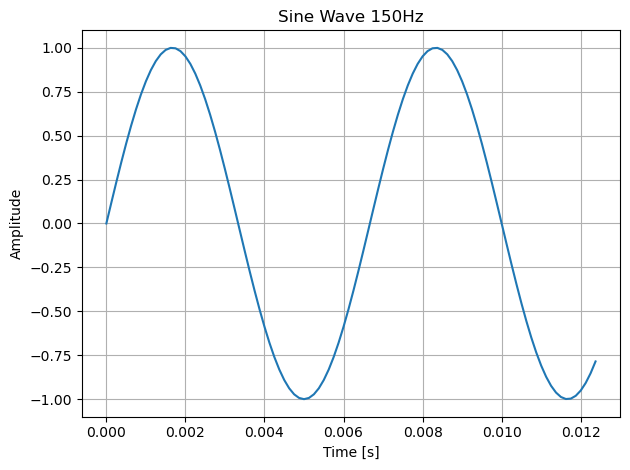

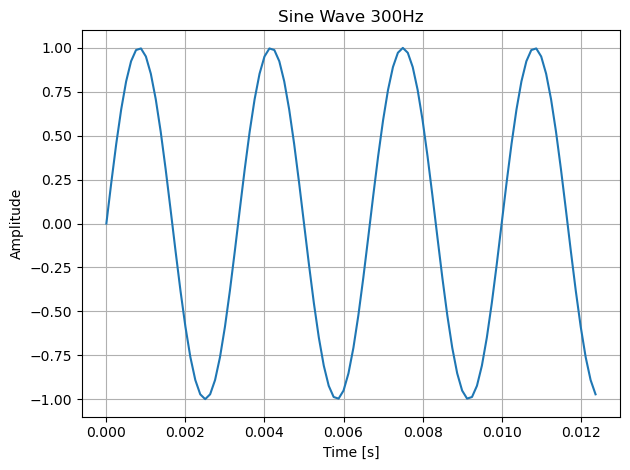

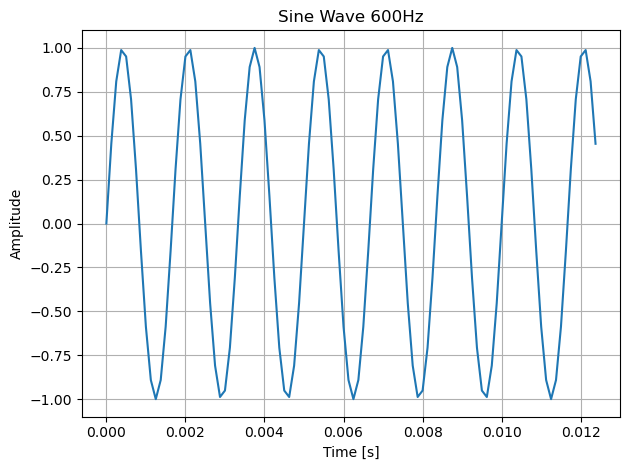

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

fs = 8000
fsig1 = 150
fsig2 = 300
fsig3 = 600# change the value of fsig for parts (i) to (vi)

Nsamp = 100

t1, x1 = sinegen(fs, fsig1, Nsamp)
t2, x2 = sinegen(fs, fsig2, Nsamp)
t3, x3 = sinegen(fs, fsig3, Nsamp)

plt = plot_signal(t1, x1, title='Sine Wave ' + str(fsig1) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig1) + '_hz.pdf')
plt.show()

plt = plot_signal(t2, x2, title='Sine Wave ' + str(fsig2) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig2) + '_hz.pdf')
plt.show()

plt = plot_signal(t3, x3, title='Sine Wave ' + str(fsig3) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig3) + '_hz.pdf')
plt.show()

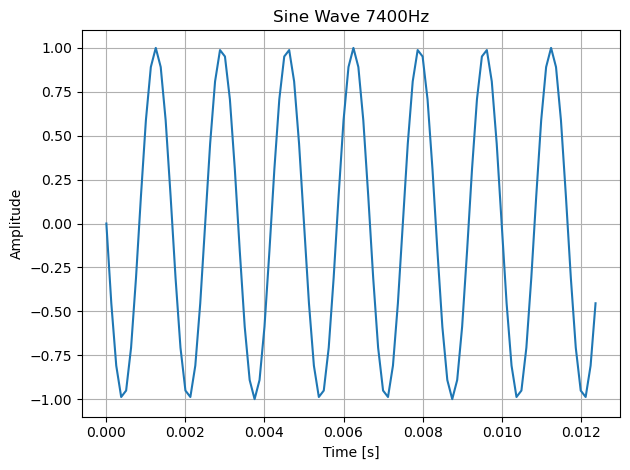

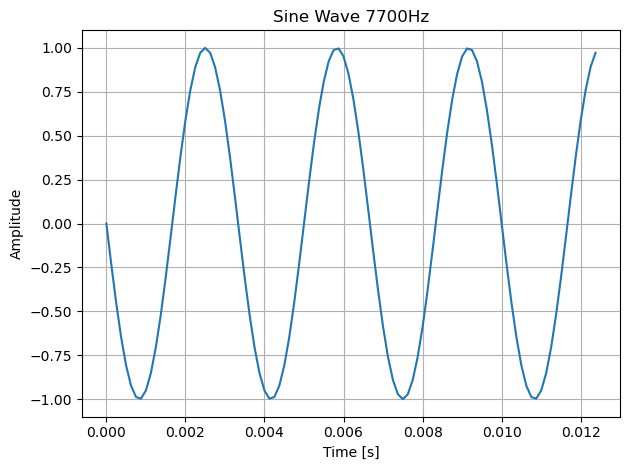

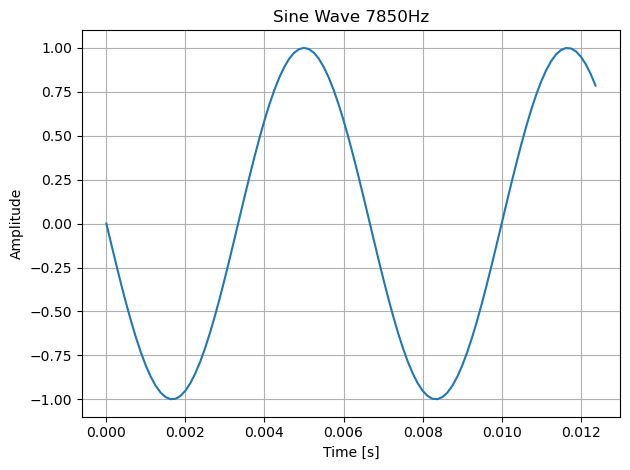

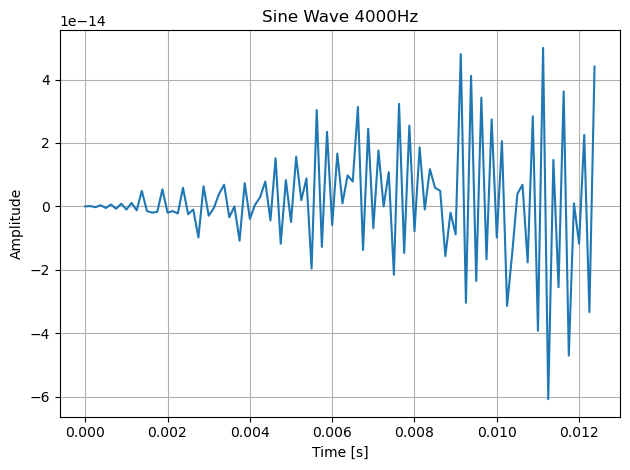

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

fs = 8000
fsig1 = 7400
fsig2 = 7700
fsig3 = 7850# change the value of fsig for parts (i) to (vi)
f_critical = 4000
Nsamp = 100

t1, x1 = sinegen(fs, fsig1, Nsamp)
t2, x2 = sinegen(fs, fsig2, Nsamp)
t3, x3 = sinegen(fs, fsig3, Nsamp)
t4, x4 = sinegen(fs, f_critical, Nsamp)

plt = plot_signal(t1, x1, title='Sine Wave ' + str(fsig1) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig1) + '_hz.pdf')
plt.show()

plt = plot_signal(t2, x2, title='Sine Wave ' + str(fsig2) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig2) + '_hz.pdf')
plt.show()

plt = plot_signal(t3, x3, title='Sine Wave ' + str(fsig3) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig3) + '_hz.pdf')
plt.show()

plt = plot_signal(t4, x4, title='Sine Wave ' + str(f_critical) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(f_critical) + '_hz.pdf')
plt.show()

The plots created above (e.g. `ex3_sine_150_hz.pdf`) will have also been saved to the `/results/ex3/` folder so you now have a record of all the plots.

**Question 3.1** Describe and discuss the results for (i)-(iii) and (iv)-(vi).

**Observation :** For 300Hz, the sampled wave looked pretty smooth still with little distortion. At 600Hz you can start seeing the distortion as the peaks become more rough and edgy

Let $f_r = \frac{f_{sampling}}{f_{sig}}$ then for :

- i : $f_r = \frac{8000}{150} = 53.3 > 2$   Oversampling

- ii : $f_r = \frac{8000}{300} = 26.67 > 2$ Oversampling

- iii : $f_r = \frac{8000}{600} = 13.3 > 2$ Oversampling

- iv : $f_r = \frac{8000}{7400} = 1.08 < 2$ Undersampling

- v : $f_r = \frac{8000}{7700} = 1.04 < 2$  Undersampling

- vi : $f_r = \frac{8000}{7850} = 1.02 < 2$ Undersampling

The undersampled plots look smoother however. Yet the plots frequency is much lower than it should be - aliasing has occured and the resultant waveform isnt of the correct freq


**Question 3.2** Predict the results for frequencies $f=24150$ Hz, $\: f=24300$ Hz and $\: f=24600$ Hz and confirm your prediction with Python.

- $f_r = \frac{8000}{24150} = 0.33 < 2$   

- $f_r = \frac{8000}{24300} = 0.329 < 2$ 

- $f_r = \frac{8000}{24600} = 0.325 < 2$ 

The ratio of the highest freq to the sampling is around the same for each of the signal frequencies so perhaps the plots will look similiar. Also, 8000/2400 is 1/3

**Observation**

It seems like these waveforms look exactly like the first set of waveforms. This is weird since the ratio of sample frequency to the signal frequency are different. However, the denominator is just (24000 + original set of wave frequencies) so perhaps that plays a role

Maybe because the signal frequency is 3x the sampling frequency + some offset (150, 300, 600) when you sample it, the resultant spectrum will be the sampled signal copies centered around n x the sampling frequency. Thus when you shift the sampled spectrum (which is already just peaks at 3x the sampling freq + offset) it will look like you only have the offsets present (ie overlap) and the waveforms look like parts i-iii

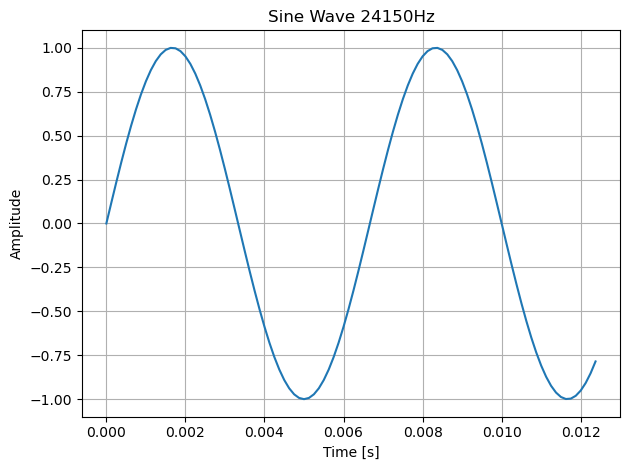

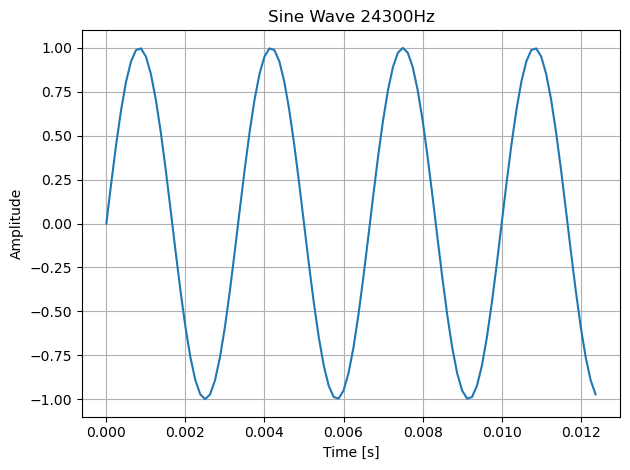

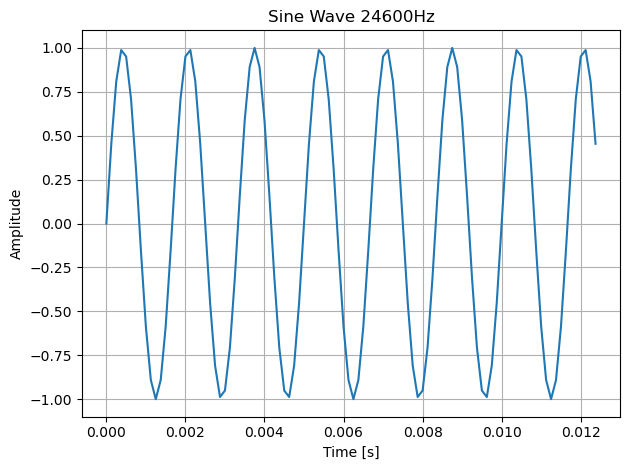

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

fs = 8000
fsig1 = 24150
fsig2 = 24300
fsig = 24600# change the value of fsig for parts (i) to (vi)

Nsamp = 100

t1, x1 = sinegen(fs, fsig1, Nsamp)
t2, x2 = sinegen(fs, fsig2, Nsamp)
t3, x3 = sinegen(fs, fsig3, Nsamp)

plt = plot_signal(t1, x1, title='Sine Wave ' + str(fsig1) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig1) + '_hz.pdf')
plt.show()

plt = plot_signal(t2, x2, title='Sine Wave ' + str(fsig2) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig2) + '_hz.pdf')
plt.show()

plt = plot_signal(t3, x3, title='Sine Wave ' + str(fsig3) + 'Hz', xlabel='Time [s]', ylabel='Amplitude')
plt.savefig('results/ex3/ex3_sine_' + str(fsig3) + '_hz.pdf')
plt.show()

**Question 3.3** Consider $x(t)=\cos(100\pi t)$

---
$\quad$ **(a) Determine the minimum sampling rate to avoid aliasing**


$$\omega_{sig} = 2 \pi f_{sig} \rightarrow f_{sig} = \frac{100\pi}{2\pi} = 50Hz$$

  To avoid aliasing we need $f_{sampling} > 2 f_{signal max}$ 

  Thus :

  $$f_{sampling} > 2 f_{signal max} \rightarrow f_{sampling} > 100Hz$$

---

$\quad$ **(b) Write down an expression for $x[n]$ if a sampling frequency of 200 Hz is used.**

  $$x[n] = x(nT_{sample}) = x(\frac{n}{200}) = cos(100\pi [\frac{n}{200}]) = cos(\frac{n\pi}{2}) $$

for even n 

  $$x[2k] = +- 1$$ 

for odd n 

  $$x[2k-1] = 0$$ 

This forms an aletrnating up and down patter which looks like zig zag wave

---

$\quad$ **(c) Write down an expression for $x[n]$ if a sampling frequency of 75 Hz is used.**

  $$x[n] = x(nT_{sample}) = x(\frac{n}{75}) = cos(100\pi [\frac{n}{75}]) = cos(\frac{4n\pi}{3})$$

- $n : 1 \:\: 2\:\: 3\:\:4\:\:5$ 
- $x[n] : 1 \:\:-\frac{1}{2} \:\: -\frac{1}{2}\:\: 1\:\: -\frac{1}{2}\:\: -\frac{1}{2}$

This creates a triangle like wave pattern of time period 3 samples. (tent like wave - not accurate)

---

**Question 3.4** If the sampling frequency is 48 kHz, what is the normalised angular frequency of the discrete-time signal corresponding to a sinusoid at 1.2 kHz?

$$\Omega = 2\pi \frac{f_{signal}}{f_{sampling}} = 1.2/48 = 0.025$$

---

**Question 3.5** Given a signal with a normalised angular frequency of $\frac{\pi}{4}$, what is its frequency expressed in terms of the sampling frequency, $f_s$?

$$f_{signal} = \frac{f_{sample}}{8}$$

---

### Uniform quantization change to Q

Sampling is the process by which a continuous-*time* signal, $x(t)$,  becomes a discrete-*time* signal, $x[n]$. Quantization, on the other hand, is the process by which a signal with continuous amplitude is made to assume discrete amplitudes from a defined set of **quantization levels**.

Let us consider a signal $x(t)$ with amplitudes contained in the range $\pm A$. It is quantized using a simple uniform quantizer with $Q$ equally-spaced quantization levels such that the quantization step is $W=\frac{2A}{Q-1}$. The quantized signal $x_q(t)$ is obtained by rounding the amplitude of $x(t)$ to the closest quantization level, or equivalently
$$x_q(t)=W\cdot \text{round}\big(\frac{x(t)}{W}\big)$$

For example, for $A=10$ and $N=21$, the quantization step is $W=1$ and an amplitude of $x(\tau)=9.2$ would lead to $x_q(\tau)=9$.

The quantization error is the difference between the original signal $x(t)$ and the quantized signal $x_q(t)$. 

<img src="img/ex3_quant.svg" alt="drawing" width="900"/>
<center>Figure 3.4: The sampling and quantization processes</center>

**Question 3.6** For the example above ($A=10$, $Q=21$, and $W=1$), give the maximum and minimum values that the quantization error can take.

max error would be when x(t) is something like 9.5 and thus gets rounded to 10 - giving an error of 0.5
min error would be when x(t) is exactly some integer value like x(t) = 10, then the error would be 0

**Question 3.7** Implement the simple quantizer described above using your own `quantizer` function in the cell below. Plot a sine wave of amplitude $10$ quantized using $21$ levels.

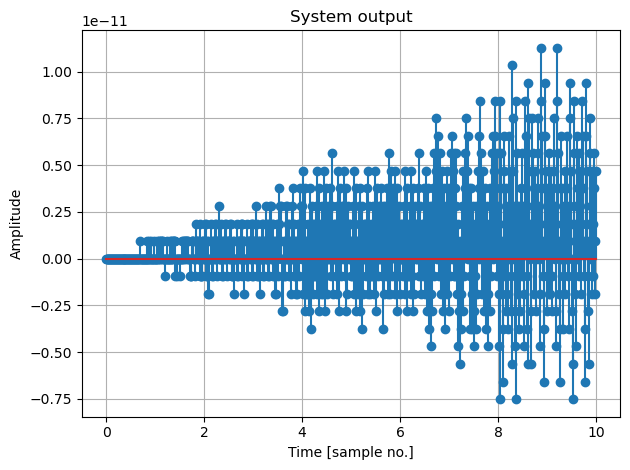

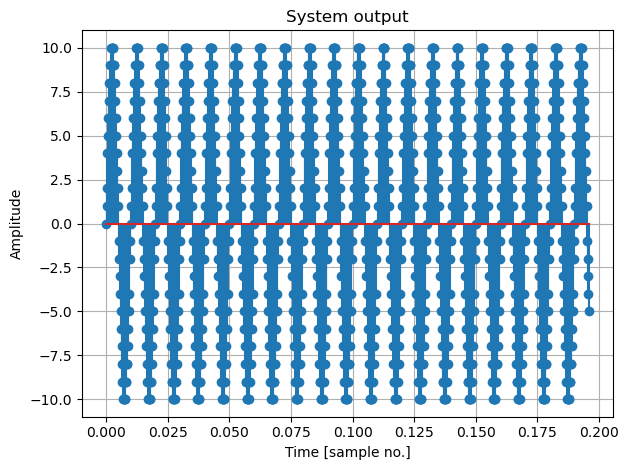

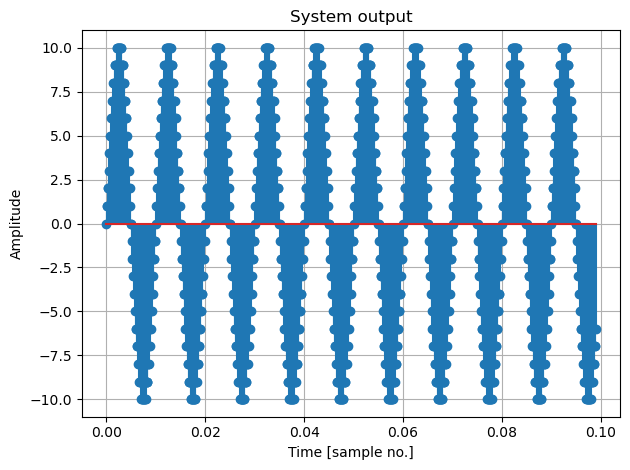

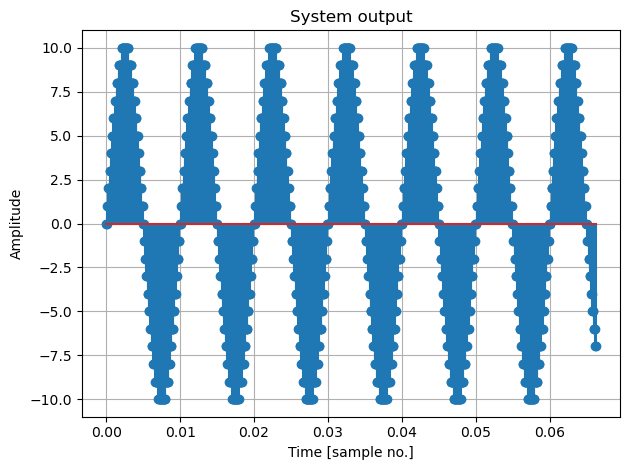

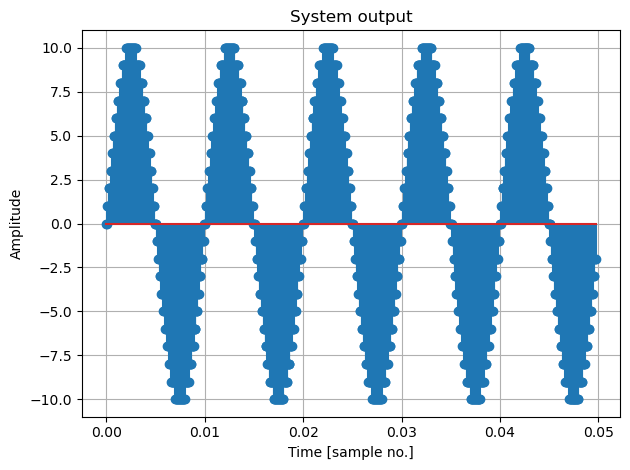

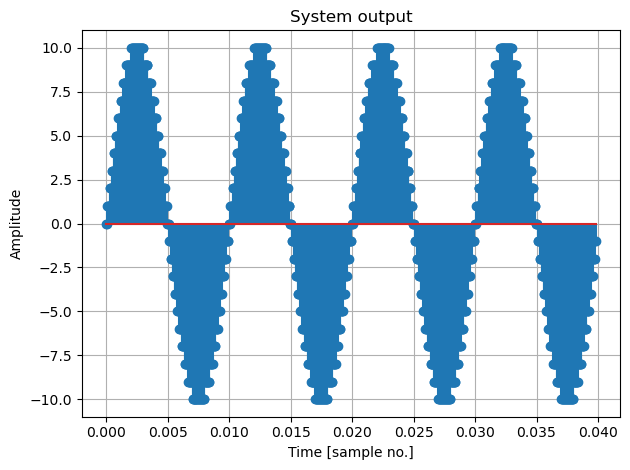

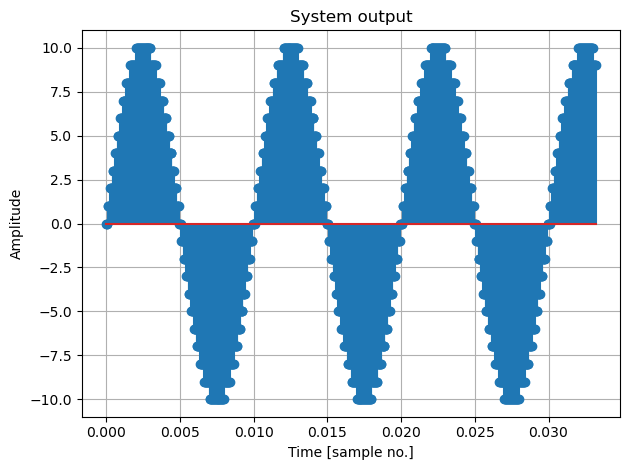

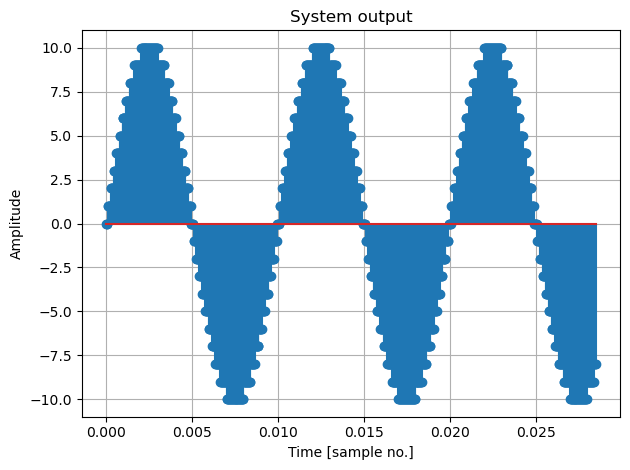

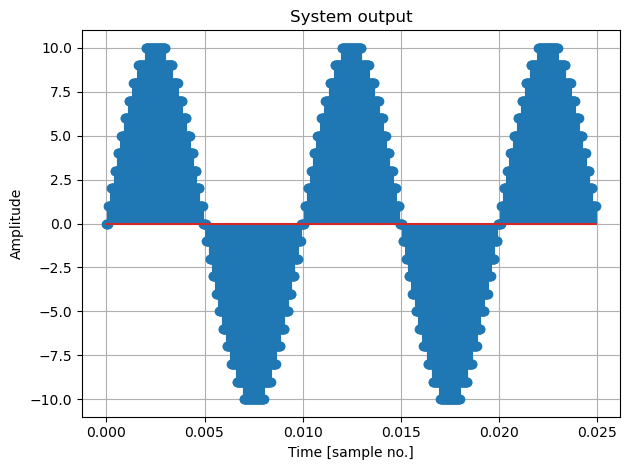

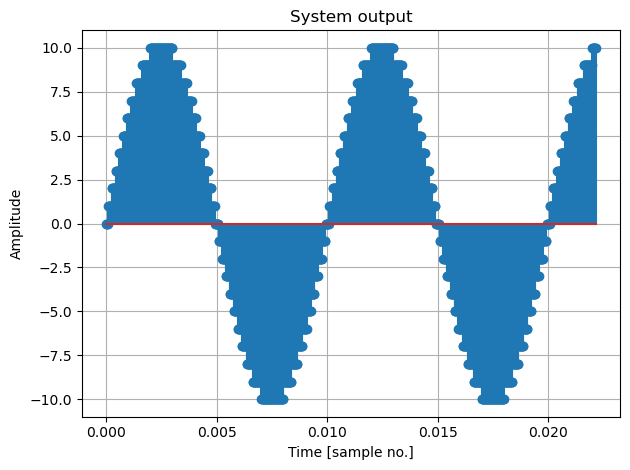

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rand

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

def quantizer(x, dynrange, N):
    # x is the signal to quantize
    # dynrange is the as dynamic range of your quantizer expressed as a min and max value
    # N is the number of quantization levels
    Max_x = np.max(x)
    Min_x = np.min(x)

    if(dynrange == None ):
        Max_q = np.ceil(Max_x)
        Min_q = np.ceil(Min_x)

    else :
        Max_q = dynrange['Max']
        Min_q = dynrange['Min']

    W = (Max_x + np.abs(Min_x)) / (N - 1)

    y=[]

    for x_i in x :

        if (x_i > Max_q)   : y.append(Max_q)
        
        elif (x_i < Min_q) : y.append(Min_q)

        else : y.append(W * np.round(x_i/W))

    return y
    


dynrange = {'Max' : 100 , 'Min' : -50 }
n_quant = 21

fs = [i for i in range(100,50000,5000)]
fsig = 100
n_sample = 1000

mask1 = []
mask2 = []
y = []

for f in fs :

    t,x = sinegen(f, fsig, n_sample)
    y.append([t,10*x])


for i in range(len(fs)) :

    mask1.append(rand.randint(50))

    if(i< len(fs)/4):
        mask2.append(50)

    elif(i < len(fs)/2) :
        mask2.append(100)

    elif(i < 3*(len(fs)/4)) :
        mask2.append(50)

    else : 
        mask2.append(100)

def plotter(y, mask_no, dyn_r, quant_n):
    mask_iter = 0

    for signals in y :

        signals[1] = quantizer(signals[1], dyn_r, quant_n)

        plt = plot_signal(signals[0], signals[1], title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
        plt.show()

for signals in y :

    signals[1] = quantizer(signals[1], dynrange, n_quant)

    plt = plot_signal(signals[0], signals[1], title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
    plt.show()


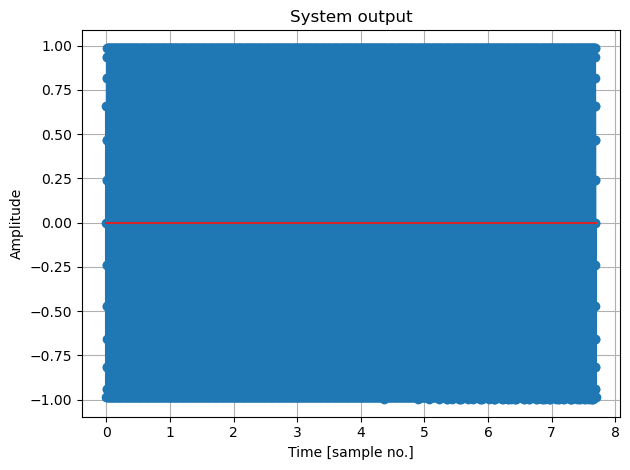

In [2]:
# plot a quantized sine wave here
import matplotlib.pyplot as plt
import numpy as np
from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal
def quantizer(x, dynrange, N):
    # x is the signal to quantize
    # dynrange is the as dynamic range of your quantizer expressed as a min and max value
    # N is the number of quantization levels
    Max_x = np.max(x)
    Min_x = np.min(x)

    if(dynrange == None ):
        Max_q = np.ceil(Max_x)
        Min_q = np.ceil(Min_x)

    else :
        Max_q = dynrange['Max']
        Min_q = dynrange['Min']

    W = (Max_x + np.abs(Min_x)) / (N - 1)

    y=[]

    for x_i in x :

        if (x_i > Max_q)   : y.append(Max_q)
        
        elif (x_i < Min_q) : y.append(Min_q)

        else : y.append(W * np.round(x_i/W))

    return y

dynrange = {'Max' : 50 , 'Min' : -50 }

t,x = sinegen(1300, 500, 10000)

y = quantizer(x, dynrange, 200)


plt = plot_signal(t, y, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex3/3.7.pdf')
plt.show()

**Question 3.8** Plot the quantization error for the sine wave in Question 3.7. Does your result match your answer to Question 3.6? What is the root mean square (RMS) error? Compare this to Exercise 8 of Problem Sheet 3.

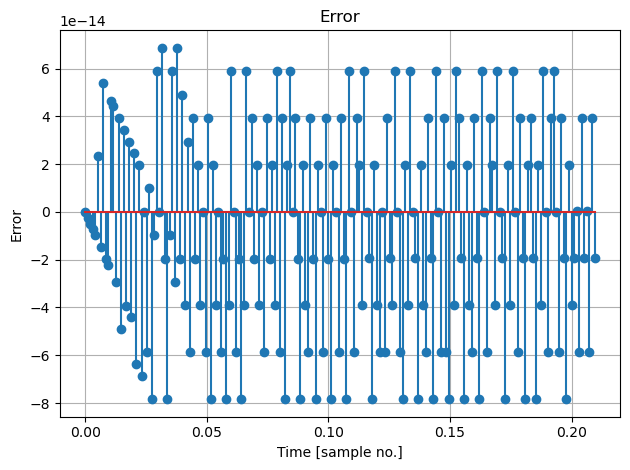

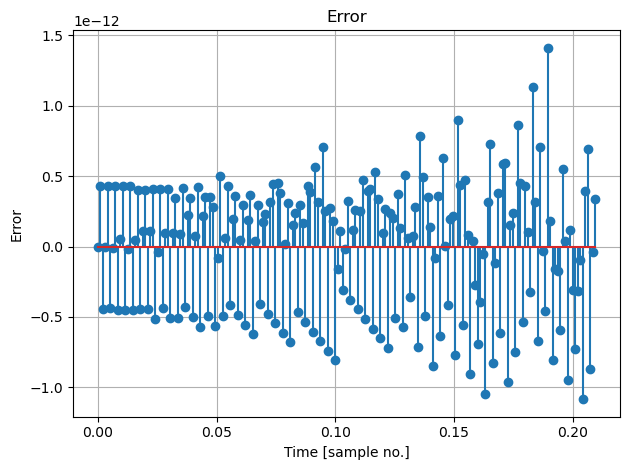

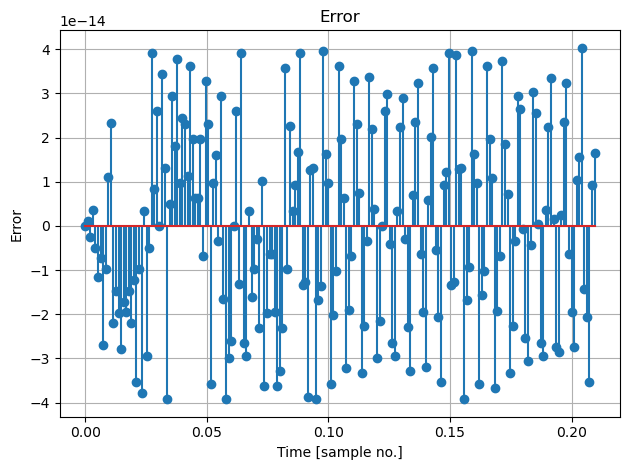

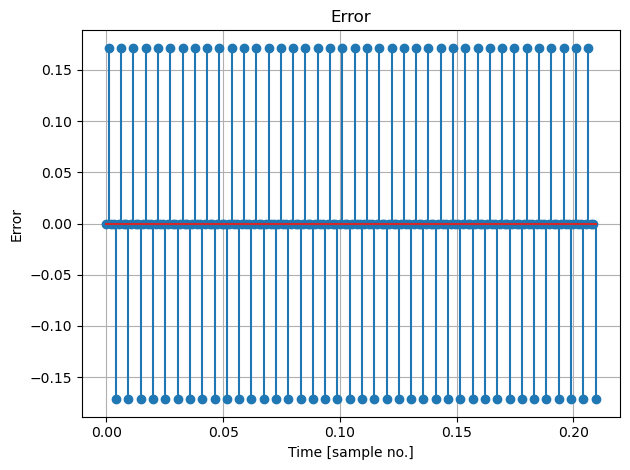

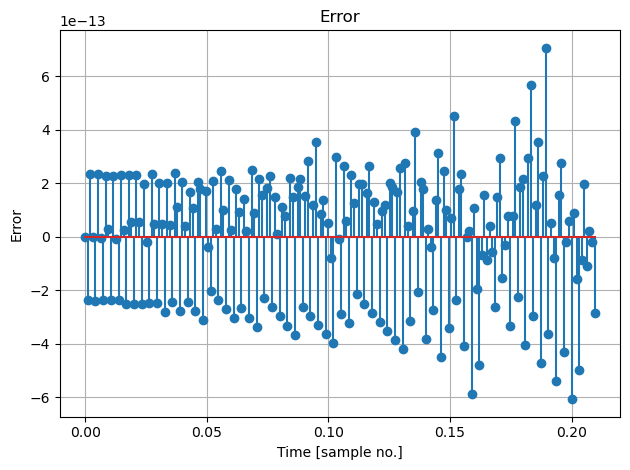

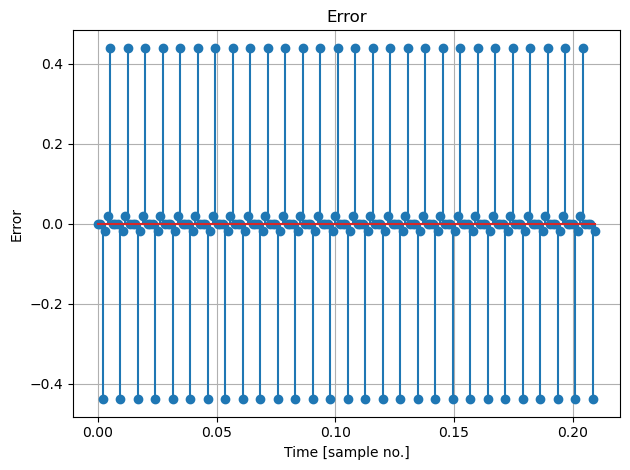

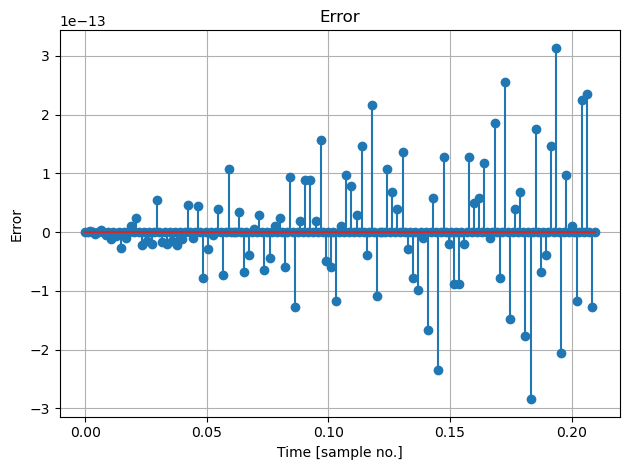

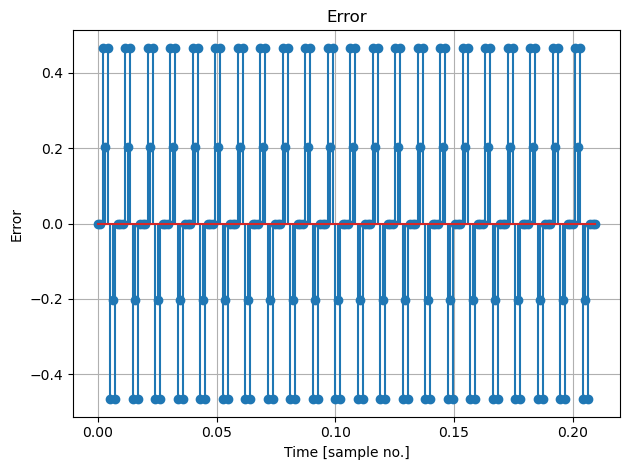

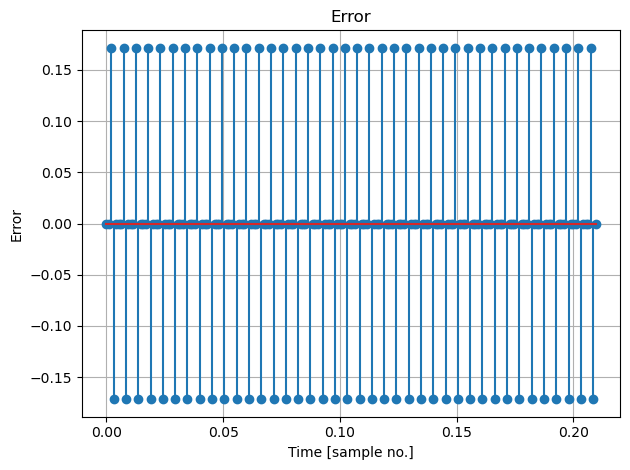

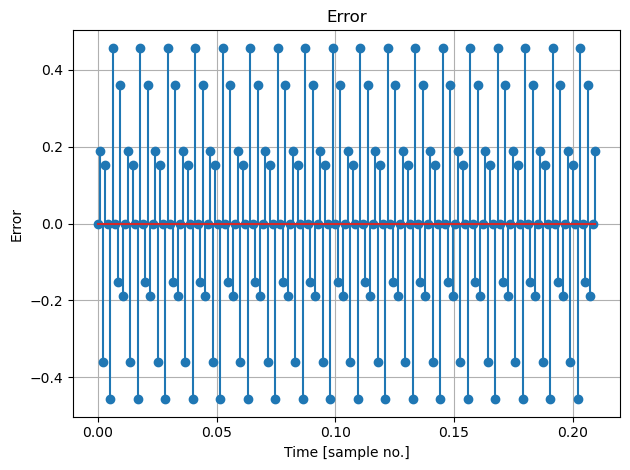

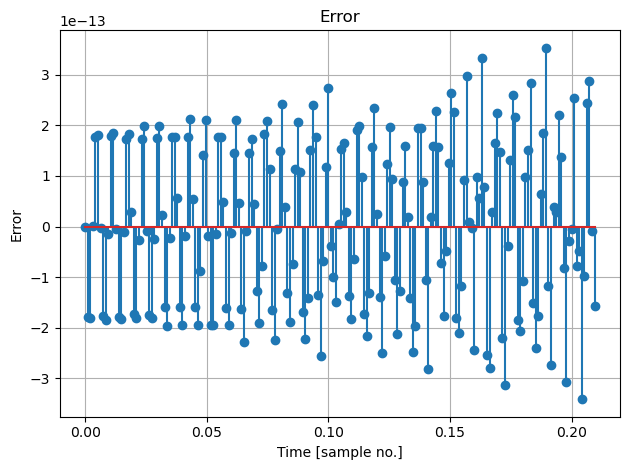

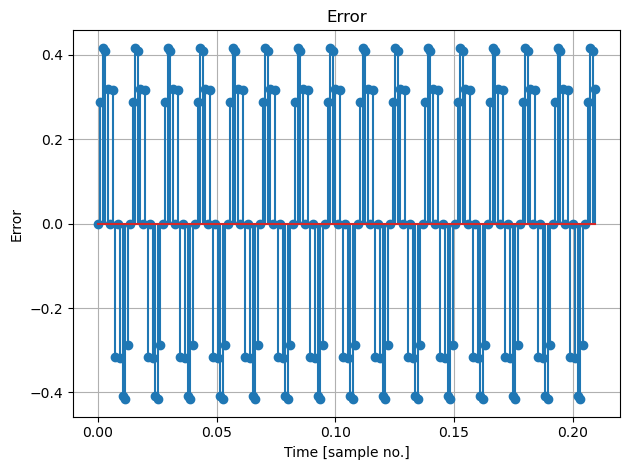

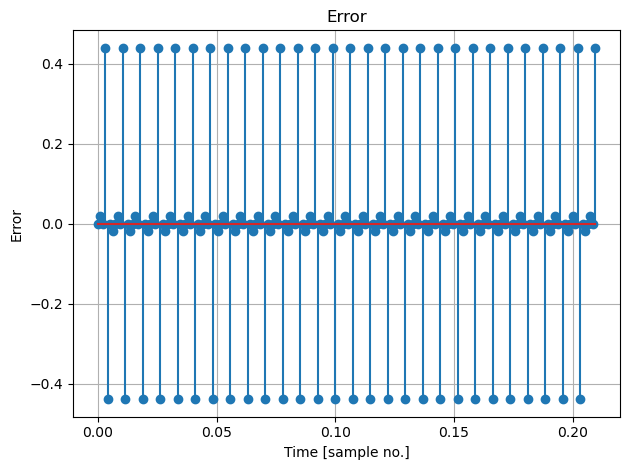

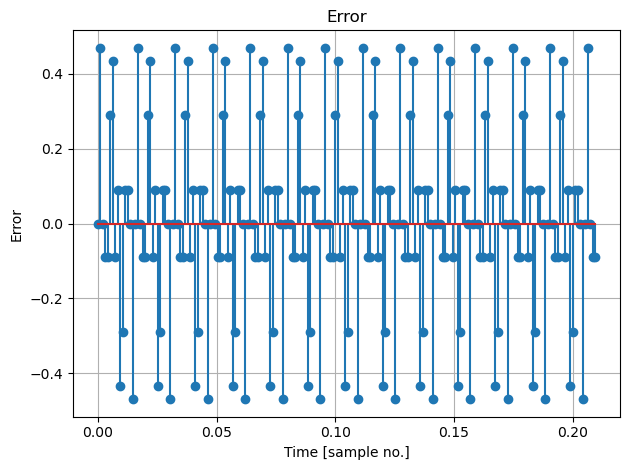

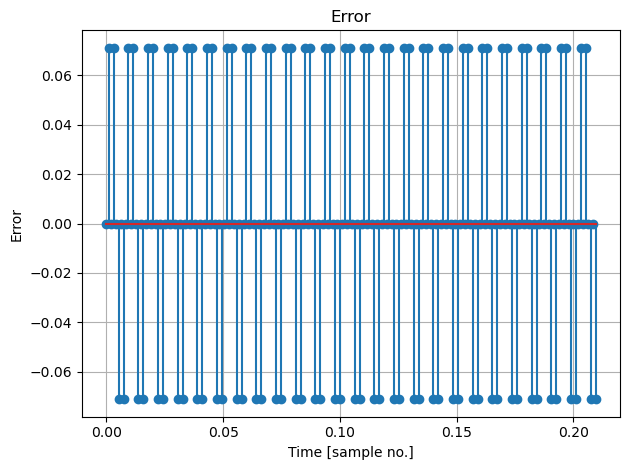

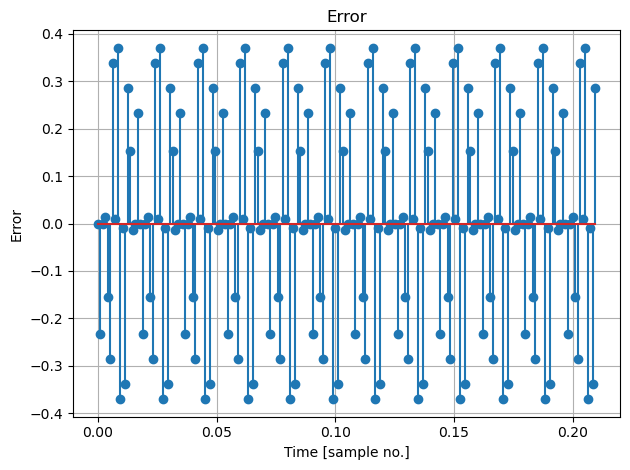

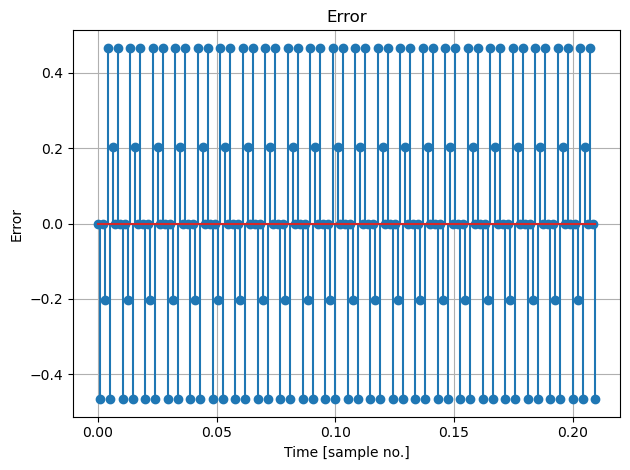

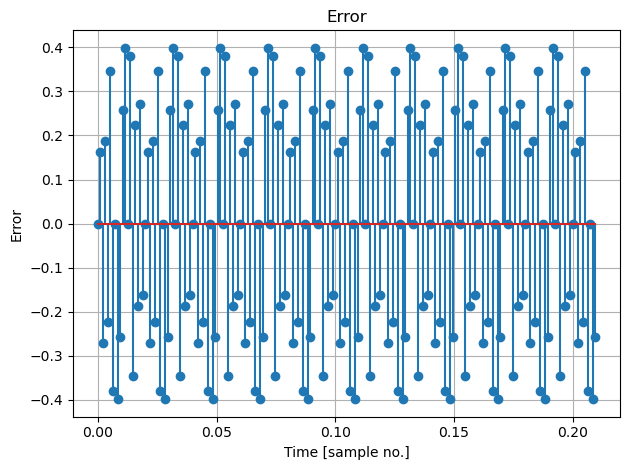

In [8]:
# plot quantization error here
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rand

from functions.lab_functions import sinegen, cosgen
from functions.lab_functions import plot_signal

def quantizer(x, dynrange, N):
    # x is the signal to quantize
    # dynrange is the as dynamic range of your quantizer expressed as a min and max value
    # N is the number of quantization levels
    Max_x = np.max(x)
    Min_x = np.min(x)

    if(dynrange == None ):
        Max_q = np.ceil(Max_x)
        Min_q = np.ceil(Min_x)

    else :
        Max_q = dynrange['Max']
        Min_q = dynrange['Min']

    W = (Max_x + np.abs(Min_x)) / (N - 1)

    y=[]

    for x_i in x :

        if (x_i > Max_q)   : y.append(Max_q)
        
        elif (x_i < Min_q) : y.append(Min_q)

        else : y.append(W * np.round(x_i/W))

    return y
    

dynrange = {'Max' : 100 , 'Min' : -50 }
n_quant = 21

fs = [i for i in range(100,1000,50)]
fsig = 100
n_sample= 200
mask1 = []
mask2 = []
y = []

for f in fs :

    t,x = sinegen(f, fsig, n_sample)
    y.append([t,10*x])


for i in range(len(fs)) :

    mask1.append(rand.randint(50))

    if(i< len(fs)/4):
        mask2.append(50)

    elif(i < len(fs)/2) :
        mask2.append(100)

    elif(i < 3*(len(fs)/4)) :
        mask2.append(50)

    else : 
        mask2.append(100)

def getError(quantized_sig, true_sig):
    error = []

    for iter in range(len(true_sig)):
        er = true_sig[iter] - quantized_sig[iter]
        error.append(er)
    
    return error

error_iter = 0
error = []

for signals in y :
  
    true_sig = signals[1]
    quantized_sig = quantizer(signals[1], dynrange, n_quant)

    error.append( getError(quantized_sig, true_sig) )


for er in error:
    
    plt = plot_signal(signals[0], error[error_iter], title='Error', xlabel='Time [sample no.]', ylabel='Error', func='stem')
    #plt = plot_signal(signals[0], quantized_sig[1], title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
    plt.show()

    error_iter+=1
  